In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load the Dataset
data_path = 'alzheimers_disease_data (1) .csv'
data = pd.read_csv(data_path)

In [5]:
for col in data.columns:
    if data[col].dtype == 'number':  # Check for numeric columns
        data[col] = data[col].fillna(data[col].median())  # Use median for missing values
    else:  # Non-numeric columns
        data[col] = data[col].fillna('Unknown')  # Replace with 'Unknown'

print("Processed Data:")
print(data)

Processed Data:
      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalA

In [6]:
# Display the first few rows of the dataset
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [7]:
data.tail()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid
2148,6899,72,0,0,2,33.289738,0,7.890703,6.570993,7.941404,...,0,1,8.327563,0,1,0,0,1,0,XXXConfid


In [8]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [10]:
# Check for missing values
print(data.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [11]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate IQR for each numeric column
Q1 = numeric_data.quantile(0.25)  # First quartile (25%)
Q3 = numeric_data.quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1

# Define bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
P = lower_bound.min()
Q = upper_bound.max()
print(P)
print(Q)

-128.30051318721405
7973.0


In [12]:
# Drop rows with missing values (or handle them as needed)
data.dropna(inplace=True)

In [13]:
data.drop(columns=['DoctorInCharge'], inplace=True)
data.drop(columns=['PatientID'], inplace=True)

In [14]:
# Define features and target variable
# Assuming 'diagnosis' is the target variable and the rest are features
X = data.drop(columns=['Diagnosis'])  # Replace 'diagnosis' with the actual target column name
y = data['Diagnosis']  # Replace 'diagnosis' with the actual target column name

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
selector = RandomForestClassifier(n_estimators=100)
selector.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
# Get feature importances
importances = selector.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Display feature importances
print(feature_importances)

                           importance
FunctionalAssessment         0.194312
ADL                          0.166020
MMSE                         0.123752
MemoryComplaints             0.079458
BehavioralProblems           0.042994
CholesterolHDL               0.030158
SleepQuality                 0.029733
CholesterolTriglycerides     0.029496
DietQuality                  0.029213
PhysicalActivity             0.028594
AlcoholConsumption           0.027742
CholesterolLDL               0.027669
BMI                          0.027492
CholesterolTotal             0.026222
SystolicBP                   0.025361
Age                          0.024313
DiastolicBP                  0.023238
EducationLevel               0.012156
Ethnicity                    0.007460
Hypertension                 0.004242
Smoking                      0.004083
Forgetfulness                0.004024
FamilyHistoryAlzheimers      0.003699
CardiovascularDisease        0.003688
Gender                       0.003572
PersonalityC

In [17]:
# Select important features
threshold = 0.05  
selected_features = feature_importances[feature_importances['importance'] > threshold].index.tolist()

print("Selected Feature are:\n")
print(selected_features)

Selected Feature are:

['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints']


In [18]:
# Reduce the dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [19]:
# Train a Random Forest Classifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train_selected, y_train)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,  # 5-fold cross-validation
    verbose=2
)

# Ensure you have the training data variables defined
# X_train_selected is the feature-selected version of X_train (or just X_train if not using feature selection)
grid_search.fit(X_train_selected, y_train)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_dep

In [21]:
model.fit(X_train_selected,y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Make predictions
y_pred = model.predict(X_test_selected)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation Accuracy: 0.9017 ± 0.0121


In [25]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy:.2f}')

Accuracy of the model: 0.90


In [26]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       277
           1       0.94      0.75      0.84       153

    accuracy                           0.90       430
   macro avg       0.91      0.86      0.88       430
weighted avg       0.90      0.90      0.89       430



In [27]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.10465116279069768


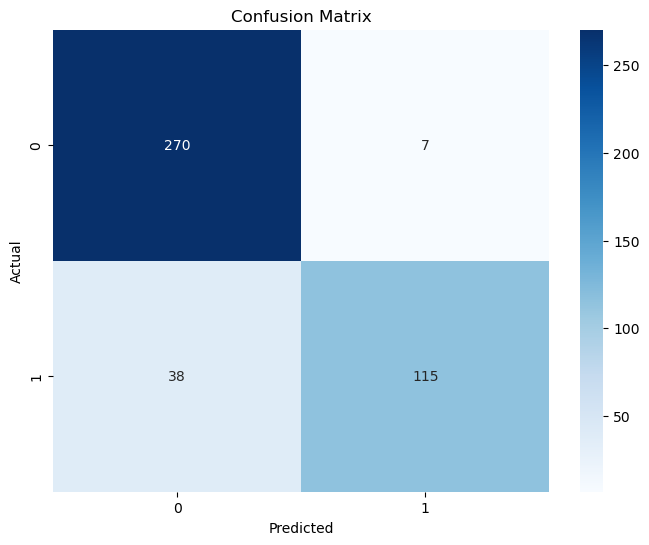

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Model Evaluation:")
print(f"ROC-AUC Score: {roc_auc:.2f}")

y_pred = model.predict_proba(X_test_selected)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


NameError: name 'y_pred_proba' is not defined

In [ ]:
pip install joblib


In [ ]:
import joblib

# Save the model to a .pkl file
joblib.dump(model, 'alzheimers_model.pkl')
